In [ ]:
# Handling Data
import pandas as pd
import numpy as np

# Visialization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# For Text processing
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# ML
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# DL
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Conv1D, Dense, MaxPooling1D, BatchNormalization, Flatten, Dropout
from tensorflow.keras.models import Sequential

#Accuracy Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data = pd.read_csv('songs_with_lyrics.csv')

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Song Title    119 non-null    object 
 1   Artist        119 non-null    object 
 2   Album         69 non-null     object 
 3   Release Year  69 non-null     float64
 4   Genre         119 non-null    object 
 5   Lyrics        119 non-null    object 
dtypes: float64(1), object(5)
memory usage: 5.7+ KB


,Song Title,Artist,Album,Release Year,Genre,Lyrics
0,Bohemian Rhapsody,Queen,A Night at the Opera,1975.0,Rock,Is this the real life? Is this just fantasy?\n...
1,Shape of You,Ed Sheeran,÷ (Divide),2017.0,Pop,The club isn't the best place to find a lover\...
2,Rolling in the Deep,Adele,21,2010.0,Pop Soul,There's a fire starting in my heart\nReaching ...
3,Hotel California,Eagles,Hotel California,1976.0,Rock,On a dark desert highway\nCool wind in my hair...
4,Smells Like Teen Spirit,Nirvana,Nevermind,1991.0,Grunge,"Load up on guns, bring your friends\nIt's fun ..."


In [ ]:
# Removing Unnecessary column
data = data.drop(['Album', 'Release Year'], axis = 'columns')
data.columns = ['Title', 'Artist', 'Genre', 'Lyrics']
data.head()

,Title,Artist,Genre,Lyrics
0,Bohemian Rhapsody,Queen,Rock,Is this the real life? Is this just fantasy?\n...
1,Shape of You,Ed Sheeran,Pop,The club isn't the best place to find a lover\...
2,Rolling in the Deep,Adele,Pop Soul,There's a fire starting in my heart\nReaching ...
3,Hotel California,Eagles,Rock,On a dark desert highway\nCool wind in my hair...
4,Smells Like Teen Spirit,Nirvana,Grunge,"Load up on guns, bring your friends\nIt's fun ..."


In [ ]:
data['Genre'].value_counts()

,count
Genre,
Pop Reggaeton,16
Pop,15
Indie pop,14
Rock,10
Pop Rock,7
Alternative rock,6
Pop Disco,6
R&B,5
Electropop,5


In [ ]:
data['Class'] = np.where(data['Genre'] == 'Pop Reggaeton', 1, 0)

In [ ]:
data.head()

,Title,Artist,Genre,Lyrics,Class
0,Bohemian Rhapsody,Queen,Rock,Is this the real life? Is this just fantasy?\n...,0
1,Shape of You,Ed Sheeran,Pop,The club isn't the best place to find a lover\...,0
2,Rolling in the Deep,Adele,Pop Soul,There's a fire starting in my heart\nReaching ...,0
3,Hotel California,Eagles,Rock,On a dark desert highway\nCool wind in my hair...,0
4,Smells Like Teen Spirit,Nirvana,Grunge,"Load up on guns, bring your friends\nIt's fun ...",0


In [ ]:
data.shape

(119, 5)

In [ ]:
# No NaN in the data
data.isna().sum()

,0
Title,0
Artist,0
Genre,0
Lyrics,0
Class,0


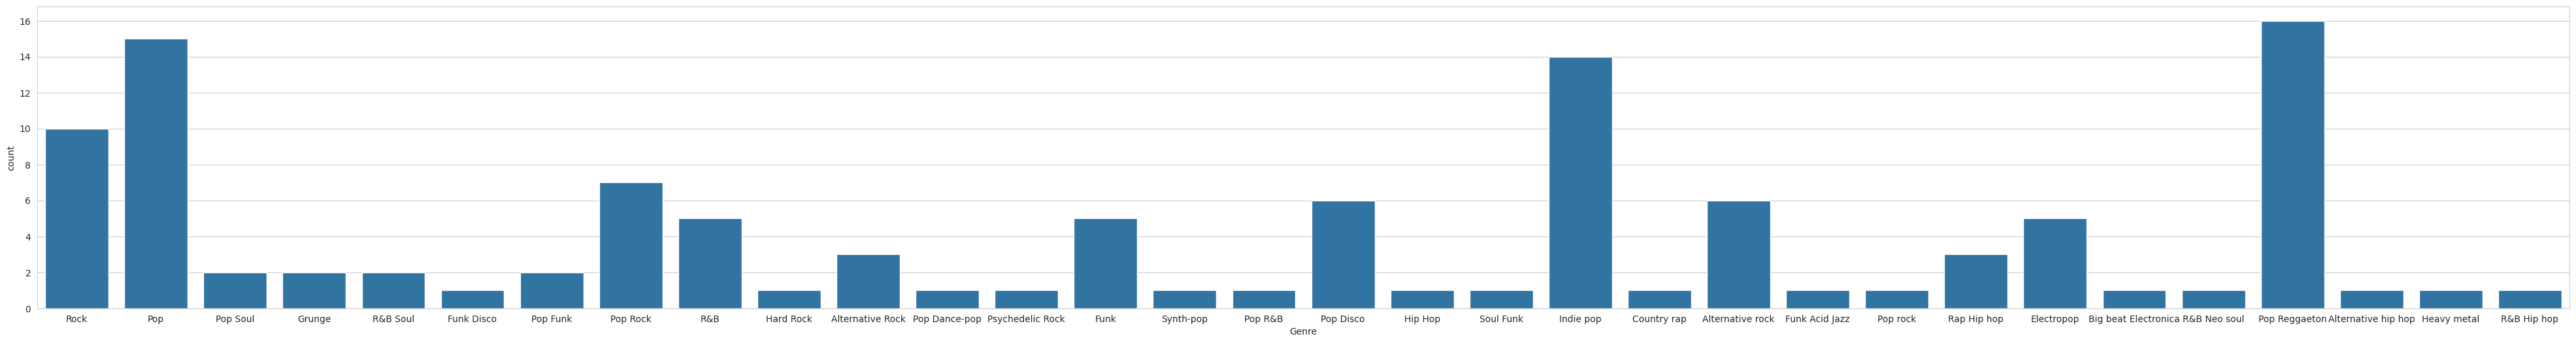

In [ ]:
# Barplot describes the count of the class Genre
plt.figure(figsize = (50, 6))
sns.countplot(data = data, x = 'Genre');

In [ ]:
# Let's see few examples of the data

for i in data.iterrows():
    print("Class Title: {}\nLyrics: \n{}\n\n".format(i[1]['Title'], i[1]['Lyrics']))
    if i[0] == 6: break

Class Title: Bohemian Rhapsody
Lyrics: 
Is this the real life? Is this just fantasy?
Caught in a landslide, no escape from reality
Open your eyes, look up to the skies and see
I'm just a poor boy, I need no sympathy
Because I'm easy come, easy go, little high, little low
Any way the wind blows doesn't really matter to me, to meMama, just killed a man
Put a gun against his head, pulled my trigger, now he's dead
Mama, life had just begun
But now I've gone and thrown it all away
Mama, ooh, didn't mean to make you cry
If I'm not back again this time tomorrow
Carry on, carry on as if nothing really mattersToo late, my time has come
Sends shivers down my spine, body's aching all the time
Goodbye, everybody, I've got to go
Gotta leave you all behind and face the truth
Mama, ooh (any way the wind blows)
I don't wanna die
I sometimes wish I'd never been born at allI see a little silhouetto of a man
Scaramouche, Scaramouche, will you do the Fandango?
Thunderbolt and lightning, very, very frighte

In [ ]:
# List of stopwords
spanishStop_words = set(stopwords.words('spanish'))
englishStop_words = set(stopwords.words('english'))

# Eliminate stopwords
data['Lyrics'] = data['Lyrics'].apply(
    lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in spanishStop_words.union(englishStop_words)])
)

In [ ]:
data.sample(77)

,Title,Artist,Genre,Lyrics,Class
24,Satisfaction,The Rolling Stones,Rock,ca n't get satisfaction ca n't get satisfactio...,0
51,Can't Take My Eyes Off You,Lauryn Hill,R&B Neo soul,'re good true Ca n't take eyes 'd like heaven ...,0
74,Corazón Partío,Alejandro Sanz,Indie pop,Tiritas pa ' corazón partío ( Tiri-Tiri-Tiriti...,0
95,Dance the night,Dua Lipa,Pop Disco,"Baby , find lights Diamonds eyes Turn rhythm ,...",0
112,Bad guy,Billie Eilish,Pop,Invisalign funny taken Invisalign taken Invisa...,0
...,...,...,...,...,...
105,The Scientist,Coldplay,Pop Rock,"Come meet , tell 'm sorry n't know lovely find...",0
86,Promesas que no valen nada,Los Piratas,Indie pop,Prometo mandar cartas pasar aquí Prometo llama...,0
25,Hey Ya!,Outkast,Funk,"One , two , three , uhMy baby n't mess around ...",0
77,Taki Taki,DJ Snake,Pop Reggaeton,"Wo-oh , oh-oh Báilame si última vez enséñame p...",1


In [ ]:
X = data['Lyrics']
y = data['Class']

print(f"Shape of X: {X.shape}\nshape of y: {y.shape}")

Shape of X: (119,)
shape of y: (119,)


Dividir los datos en test y entrenamiento

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

In [ ]:
print(f"Train Data Shape: {X_train.shape}\nTest Data Shape: {X_test.shape}")

Train Data Shape: (95,)
Test Data Shape: (24,)


In [ ]:
cVect = CountVectorizer(ngram_range=(1, 2))
cVect.fit(X_train)

CountVectorizer(ngram_range=(1, 2))

In [ ]:
print('NO.of Tokens: ',len(cVect.vocabulary_.keys()))

NO.of Tokens:  14237


In [ ]:
# document term vector (dtv)
dtv = cVect.transform(X_train)

In [ ]:
type(dtv)

scipy.sparse._csr.csr_matrix

In [ ]:
dtv = dtv.toarray()

In [ ]:
print(f"Number of Observations: {dtv.shape[0]}\nTokens/Features: {dtv.shape[1]}")

Number of Observations: 95
Tokens/Features: 14237


In [ ]:
# Let's see an sample that has been preprocessed
dtv[1]

array([0, 0, 0, ..., 0, 0, 0])

# Logistic Regression

Hyperparameter Tuning

In [ ]:
min_class_samples = y_train.value_counts().min()
cv_folds = min(4, min_class_samples, len(y_train.unique())) # Ensure cv_folds doesn't exceed the number of unique classes
cv_folds = max(cv_folds, 2) # Ensure cv_folds is at least 2


lr = LogisticRegression(verbose=1)

grid={"C":[float(i) for i in range(1, 3)], "penalty":["l2"], "solver":[ 'lbfgs', 'liblinear']}
logreg_cv=GridSearchCV(lr, grid, cv=cv_folds) # use the updated cv_folds variable
logreg_cv.fit(dtv,y_train)

print("Tuned Hpyerparameters :",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]Tuned Hpyerparameters : {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy : 0.9155585106382979


In [ ]:
%%time
lr = LogisticRegression(solver='liblinear', penalty ='l2' , C = 1.0)
lr.fit(dtv, y_train)

CPU times: user 79.5 ms, sys: 0 ns, total: 79.5 ms
Wall time: 59.4 ms


LogisticRegression(solver='liblinear')

# Evaluate on the Test data

In [ ]:
# Preprocess the test data
test_dtv = cVect.transform(X_test)
test_dtv = test_dtv.toarray()
print(f"Number of Observations: {test_dtv.shape[0]}\nTokens/Features: {test_dtv.shape[1]}")

Number of Observations: 24
Tokens/Features: 14237


In [ ]:
%%time
pred = lr.predict(test_dtv)

CPU times: user 3.2 ms, sys: 0 ns, total: 3.2 ms
Wall time: 2.65 ms


In [ ]:
print('Accuracy: ', accuracy_score(y_test, pred) * 100)

Accuracy:  87.5


In [ ]:
# 0 - No reggaeton
# 1 - Reggaeton
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93        20
           1       0.67      0.50      0.57         4

    accuracy                           0.88        24
   macro avg       0.79      0.72      0.75        24
weighted avg       0.87      0.88      0.87        24



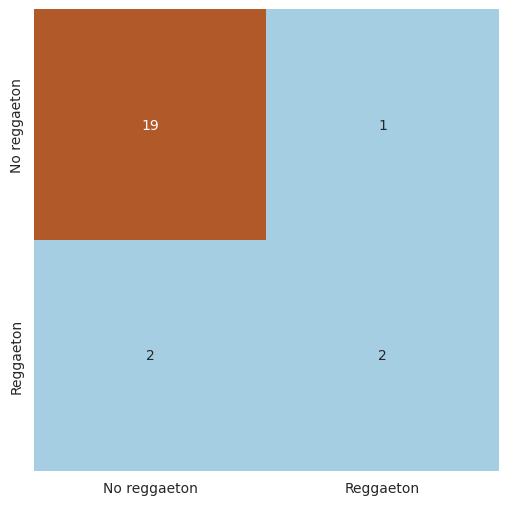

In [ ]:
cmat = confusion_matrix(y_test, pred)
plt.figure(figsize = (6, 6))
sns.heatmap(cmat, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['No reggaeton', 'Reggaeton'], yticklabels=['No reggaeton', 'Reggaeton']);

In [ ]:
def predict_class(lr):
    text = input('Enter Lyrics: ')
    text = [' '.join([ word for word in word_tokenize(text)  if not word in spanishStop_words and englishStop_words])]
    t_dtv = cVect.transform(text).toarray()
    print('Predicted Genre:', end = ' ')
    print('Reggaeton' if lr.predict(t_dtv)[0] else 'No Reggaeton')
    prob = lr.predict_proba(t_dtv)*100
    print(f"No Reggaeton: {prob[0][0]}%\nReggaeton: {prob[0][1]}%")
    plt.figure(figsize=(12, 6))
    sns.barplot(x =['No Reggaeton', 'Reggaeton'] , y = [prob[0][0], prob[0][1]])
    plt.xlabel('Genre')
    plt.ylabel('Probalility')
    plt.show()

Enter Lyrics: Can you feel that? Ah, shit Oh, ah, ah, ah, ah Oh, ah, ah, ah, ah oh, oh, oh, oh, oh, oh Drowning deep in my sea of loathing Broken your servant I kneel (Will you give in to me?) It seems what's left of my human side Is slowly changing in me (Will you give in to me?) Looking at my own reflection When suddenly it changes Violently it changes (oh no) There is no turning back now You've woken up the demon in me Get up, come on get down with the sickness Get up, come on get down with the sickness Get up, come on get down with the sickness Open up your hate, and let it flow into me Get up, come on get down with the sickness You mother get up come on get down with the sickness You fucker get up come on get down with the sickness Madness is the gift, that has been given to me I can see inside you, the sickness is rising Don't try to deny what you feel (Will you give in to me?) It seems that all that was good has died And is decaying in me (Will you give in to me?) It seems you'r

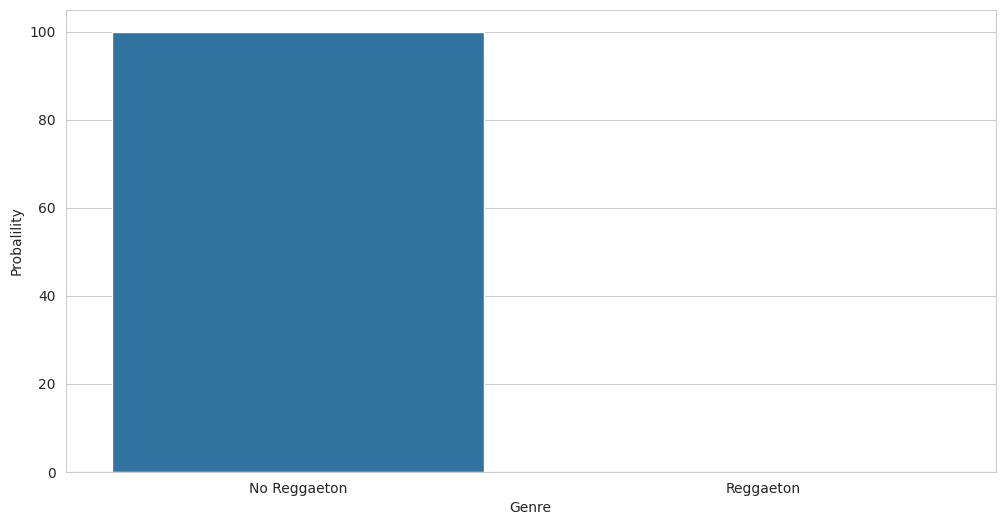

In [ ]:
predict_class(lr)